In [1]:
#### Load multiple time series
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
fig1 = plt.figure(figsize=(2, 2), dpi=100)
%config InlineBackend.figure_format = 'retina'
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
df=pd.read_csv("C:/Users/fahmida/Desktop/Rental/airbnb/calendar/calendar_2015_2019.csv")
df.head()

,Unnamed: 0,listing_id,date,available,price,Year,Month,Day,weekday_1,weekday
0,179,24084526,10/5/2018,t,42,2018,10,Friday,5,4
1,180,24084526,10/4/2018,t,42,2018,10,Thursday,4,3
2,181,24084526,10/3/2018,t,42,2018,10,Wednesday,3,2
3,182,24084526,10/2/2018,t,42,2018,10,Tuesday,2,1
4,183,24084526,10/1/2018,t,42,2018,10,Monday,1,0


<Figure size 200x200 with 0 Axes>

In [2]:
print('We have', df.date.nunique(), 'days and', df.listing_id.nunique(), 'unique listings in the calendar data.')

We have 730 days and 5206 unique listings in the calendar data.


In [3]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(df[df['weekday'] == i]['price'].mean())
    daily_median_price.append(df[df['weekday'] == i]['price'].median())

In [4]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [5]:
pricing_data=dict.fromkeys(b)

In [6]:
print(pricing_data)

{'Mon': None, 'Tue': None, 'Wed': None, 'Thu': None, 'Fri': None, 'Sat': None, 'Sun': None}


In [7]:
for i in pricing_data:
    pricing_data[i]=[]

In [8]:
print(pricing_data)

{'Mon': [], 'Tue': [], 'Wed': [], 'Thu': [], 'Fri': [], 'Sat': [], 'Sun': []}


In [9]:
## Alternate version where 
listing_id=[]
for i in df['listing_id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(df[(df['weekday'] == index) & (df['listing_id'] == i)]['price'].mean())
        

In [10]:
print(listing_id)

[24084526, 23663025, 23843646, 23187462, 23905923, 22063311, 24171704, 24135159, 24097401, 22063225, 12836532, 18477472, 1182952, 23849383, 21699256, 9648319, 21963979, 23293238, 19660231, 10719537, 6017439, 23186090, 23349585, 24077857, 24097651, 23226417, 22151214, 23927749, 6922238, 3858401, 1651605, 10284253, 11572314, 23292372, 23234034, 24000450, 23223228, 23130967, 19655045, 17574083, 21942882, 21789170, 8521909, 23246369, 24122060, 5922059, 20728600, 6625373, 23064648, 19659087, 20362540, 24098552, 23249051, 23358828, 22349967, 22972191, 21633229, 23226743, 22924319, 21394761, 23005320, 17763478, 22268881, 13449697, 11274162, 22089059, 22048823, 17668748, 20802530, 18646498, 23212848, 19908732, 14915136, 13959549, 23378092, 23065016, 10551021, 10255272, 21694113, 6181226, 21420493, 23222617, 7906581, 13927729, 22564536, 14873923, 13341011, 11277637, 14119488, 22018198, 4566721, 11168201, 13847004, 13172729, 20997820, 18823961, 12681621, 6290257, 19574238, 14126008, 23466976, 36

In [11]:
print(pricing_data)

{'Mon': [45.56, 28.0, 26.80952380952381, 28.574468085106382, 29.0, 29.4, 28.0, 38.0, 27.0, 26.0, 42.161764705882355, 35.0, 62.0, 26.333333333333332, 85.88, 34.0, 65.5, nan, 47.689655172413794, 45.1, 45.0, 32.0, 39.0, 39.0, nan, 41.92307692307692, 45.0, nan, 102.38095238095238, 52.138888888888886, 40.0, 30.0, 20.0, nan, 40.04545454545455, 74.04347826086956, 32.46153846153846, 31.333333333333332, 46.06666666666667, 49.333333333333336, 24.75, 25.0, 45.0, 30.5, 32.0, 48.869565217391305, 36.75, 55.0, 26.0, 47.0, 31.0, 27.0, 45.0, 23.0, 41.90625, 48.0, 50.42857142857143, 36.041666666666664, 37.35294117647059, 49.0, nan, 26.0, 76.0, 50.0, 89.0, 71.375, 75.0, 63.40909090909091, 137.86666666666667, 55.0, 59.53333333333333, 69.0, 120.36363636363636, 50.0, 130.0, 153.75, 79.0, 72.0, 53.92857142857143, 41.75, 25.735294117647058, 30.68421052631579, 95.25, 100.0, nan, 105.4, 85.0, 289.0, 275.0, 200.0, 150.0, 99.0, 671.98, 109.44067796610169, 94.32558139534883, nan, 93.1, 82.0, 430.0, 230.91176470588

In [12]:
results = pd.DataFrame(pricing_data)
results.to_csv("C:/Users/fahmida/Desktop/Rental/airbnb/calendar/pricing_data.csv")

In [13]:

results['listing_id'] = listing_id
results_nona = results.dropna()
print(results_nona)

             Mon         Tue         Wed         Thu         Fri         Sat  \
0      45.560000   45.480000   45.440000   45.480000   45.166667   45.083333   
1      28.000000   28.000000   28.000000   28.000000   28.000000   28.000000   
2      26.809524   27.000000   26.600000   26.636364   28.047619   26.952381   
3      28.574468   28.565217   28.744681   28.652174   28.844444   28.680851   
4      29.000000   29.000000   29.000000   29.000000   29.000000   29.000000   
5      29.400000   29.300000   29.300000   29.300000   29.384615   29.300000   
6      28.000000   28.000000   28.000000   28.000000   28.000000   28.000000   
7      38.000000   38.000000   38.000000   38.000000   38.000000   38.000000   
8      27.000000   27.000000   27.000000   27.000000   27.000000   27.000000   
9      26.000000   26.000000   26.000000   26.000000   26.000000   26.000000   
10     42.161765   42.000000   41.523077   42.179104   43.800000   41.065574   
11     35.000000   35.000000   35.000000

In [14]:
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'listing_id']]
results_nona

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
0,45.560000,45.480000,45.440000,45.480000,45.166667,45.083333,45.304348,24084526
1,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,23663025
2,26.809524,27.000000,26.600000,26.636364,28.047619,26.952381,29.190476,23843646
3,28.574468,28.565217,28.744681,28.652174,28.844444,28.680851,28.872340,23187462
4,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,23905923
5,29.400000,29.300000,29.300000,29.300000,29.384615,29.300000,29.800000,22063311
6,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,24171704
7,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,24135159
8,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,24097401
9,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,22063225


In [15]:
results_nona.to_csv("C:/Users/fahmida/Desktop/Rental/airbnb/calendar/seasonality_tomodel.csv",index=False)

In [16]:
sample = results_nona.sample(frac=0.9,axis=0)
print(sample)

              Mon          Tue          Wed          Thu          Fri  \
2117   201.000000   201.000000   201.000000   200.000000   251.666667   
1798   410.000000   410.000000   410.000000   410.000000   376.666667   
535    222.619048   222.727273   222.826087   222.391304   240.000000   
4323   450.000000   447.230769   446.400000   450.454545   540.000000   
3000   937.517241   937.586207   937.655172   937.724138   940.407407   
2585    22.666667    22.636364    22.583333    22.615385    22.615385   
5171   388.333333   377.500000   388.333333   410.000000   838.166667   
1548   396.294118   394.647059   372.764706   394.050000   461.666667   
593     75.000000    75.333333    76.333333    82.000000    82.833333   
29      52.138889    52.058824    51.805556    52.114286    52.138889   
507    295.625000   298.750000   301.212121   301.212121   301.212121   
1672   351.777778   287.857143   322.000000   289.625000   322.454545   
4100   163.090909   174.363636   169.625000   166.7

In [17]:
#Importing Datafile
results_multiplier = results_nona
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in b[1:7]:
    results_multiplier[i] = results_multiplier[i]/results_multiplier['Mon']
results_multiplier['Mon']= 1
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in b[1:7]:
    results_multiplier[i] = results_multiplier[i]/results_multiplier['Mon']
results_multiplier['Mon']= 1

In [18]:
multiplier = dict.fromkeys(b)
for index,i in enumerate(multiplier):
    multiplier[i]=results_multiplier.mean()[i]
multiplier

{'Mon': 1.0,
 'Tue': 0.9981163065282032,
 'Wed': 0.9989697416627525,
 'Thu': 1.0076226642400745,
 'Fri': 1.0800001865045186,
 'Sat': 1.0149339178174526,
 'Sun': 1.0869407254286991}

In [19]:
#We import the data and rerun the RidgeCV Regression
df = pd.read_csv('C:/Users/fahmida/Desktop/Rental/airbnb/Listings/listings_clean_recent.csv')

In [20]:
####Clustering Begins Here
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
import math
%matplotlib inline
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred,
                y_real,
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y')
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred,
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')

    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')

    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')

    return ax1, ax2, ax3

In [22]:
class model:

    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None

    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)

    def score_reg(self):
        return self.train_score, self.test_score

    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log

    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test

    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)

def model_iterations(n, x, y, model_arg, log_bool=False):
    new_model = model(model_arg)
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print('Mean Train Score:', np.mean(training_scores))
    print('Mean Test Score:', np.mean(testing_scores))
    return new_model

In [23]:
non_num_vars = df.select_dtypes(include=['object']).columns
dummy_vars = pd.get_dummies(df[non_num_vars])

In [24]:
df=df.drop(['neighbourhood','property_type','room_type','bed_type'],axis=1)
df= pd.merge(df,dummy_vars, left_index=True, right_index=True)
#df.to_csv("C:/Users/Lenovo/Desktop/Rental/airbnb/Listings/listings_clean_new.csv")

In [25]:
#df=pd.read_csv("C:/Users/Lenovo/Desktop/Rental/airbnb/Listings/listings_clean_new1.csv")
# split into x and y (note that we do not include id and host_id as predictors)
x = df.iloc[:, 2:-2]
y = df['price']
y_log = df['price_log']

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [27]:
####Analysis with Median Absolute Error
def mean_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ RandomForestRegressor(),GradientBoostingRegressor(),tree.DecisionTreeRegressor(),linear_model.LinearRegression(),linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Random Forest','Gradient Boosting','Decision Tree','Linear','Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.mean_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.mean_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)

    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Mean Absolute Error')
    plt.show()

C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.656282e-19
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.942632e-29
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.947579e-29
  overwrite_a=True).T
C:\Users\fahmida\

C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.370504e-17
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.196048e-17
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.154885e-25
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter

Model Random Forest Results: 0.5839931153184166
Model Gradient Boosting Results: 0.8492987594991445
Model Decision Tree Results: 0.35857716580608145
Model Linear Results: 2.5501382862980404e-10
Model Ridge Results: 1.9474498289881475e-06
Model RidgeCV Results: 2.0654809279771784e-08
Model Lasso Results: 0.003977956746865503
Model LassoCV Results: 4.248420884815165e-05
Model ElasticNet Results: 0.003964083700445197
Model BayesRidge Results: 0.0052650481004040016
Model OMP Results: 0.0


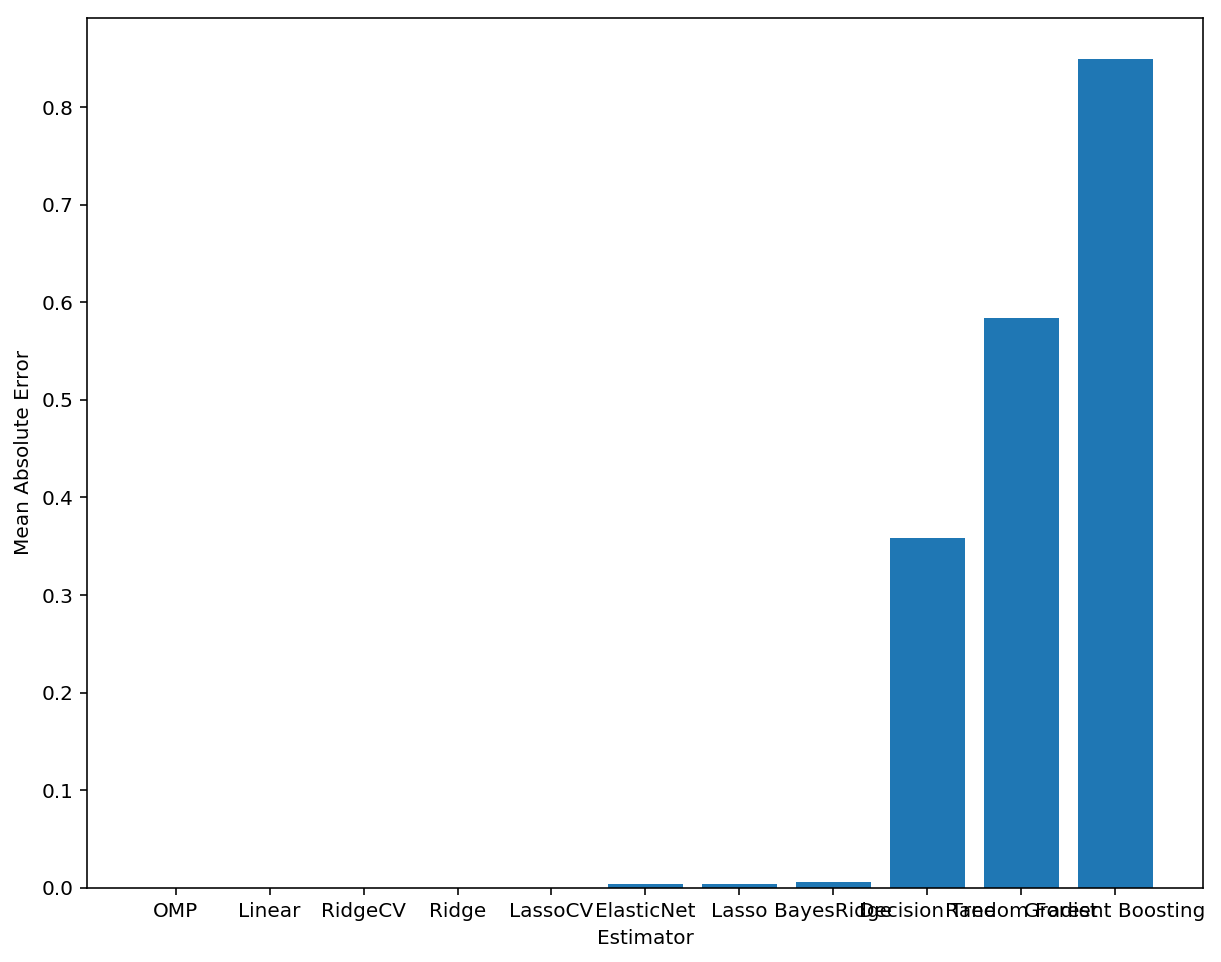

In [28]:
###MAE Untransformed Response
mean_absolute_errors(x, y)

C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.656282e-19
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.942632e-29
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.947579e-29
  overwrite_a=True).T
C:\Users\fahmida\

C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.370504e-17
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.196048e-17
  overwrite_a=True).T
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciproc

Model Random Forest Results: 0.43431014044926586
Model Gradient Boosting Results: 0.5765245079222845
Model Decision Tree Results: 0.7900172135821627
Model Linear Results: 8.155016377976587e-08
Model Ridge Results: 0.14103478142137943
Model RidgeCV Results: 4.0830922787671275e-08
Model Lasso Results: 45.94394997137549
Model LassoCV Results: 0.005791094981386442
Model ElasticNet Results: 45.78781196332706
Model BayesRidge Results: 0.07647605642577913
Model OMP Results: 2.860821161147701e-14


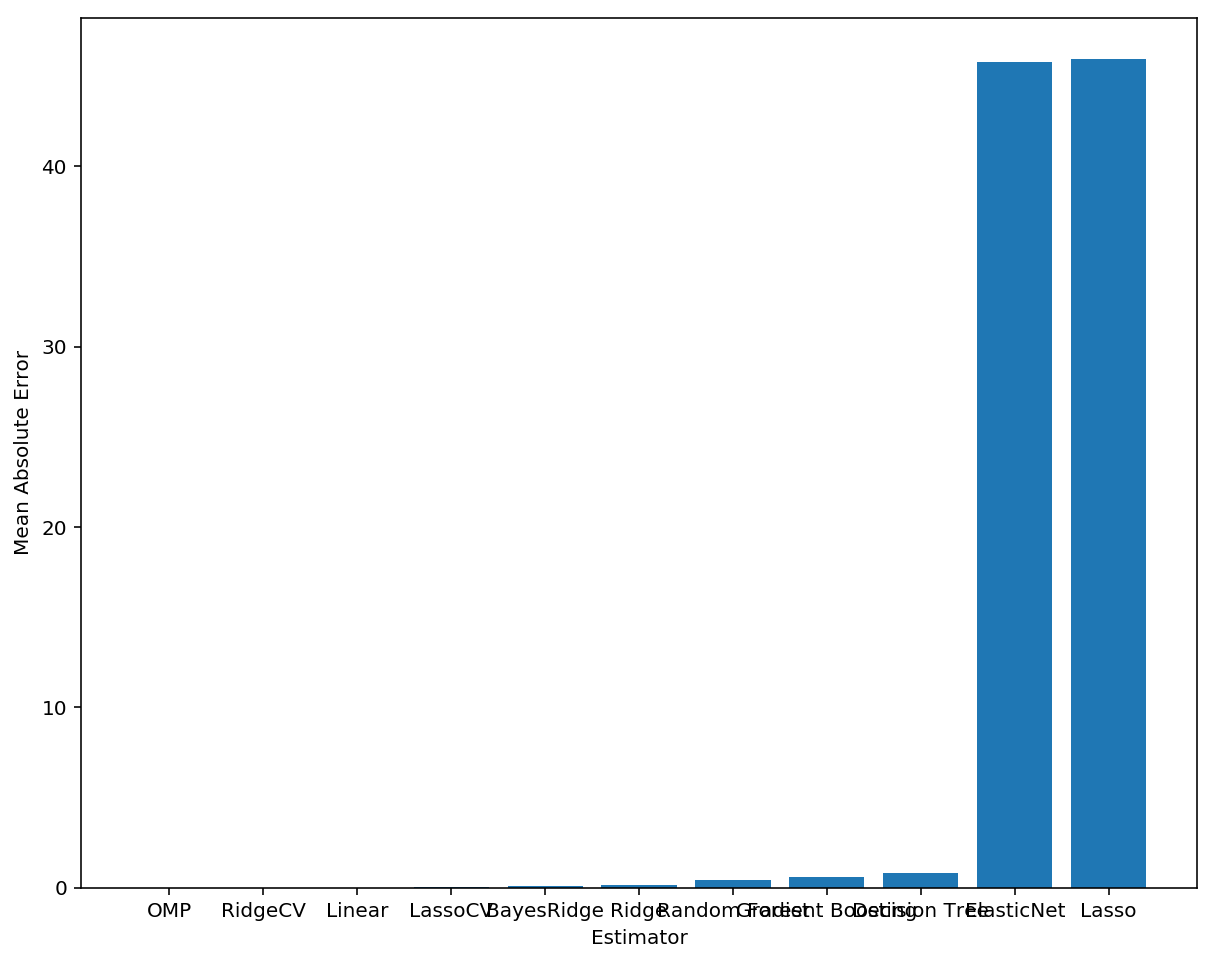

In [29]:
###MAE Log Transformed Response
mean_absolute_errors(x, y_log, True)

In [30]:
reg_params = 10.**np.linspace(-10, 5, 10)
OMP = linear_model.OrthogonalMatchingPursuit()
OMP.fit(x,y_log)

C:\Users\fahmida\Anaconda3\lib\site-packages\sklearn\linear_model\omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
             normalize=True, precompute='auto', tol=None)

In [31]:
# some of the id's in the sample can't be found. So at the end we readjust the sample dataframe too so they have the same entries
sample_variables=df.loc[df['id'].isin(sample['listing_id'])]
sample_variables.head(5)
sample_variables.shape
sample = sample.loc[sample['listing_id'].isin(sample_variables['id'])]
X_sample = sample_variables.iloc[:, 2:-2]
new_predictions = sample.copy()
new_predictions.loc[:,0:7]=0
new_predictions['Mon']=np.exp(OMP.predict(X_sample))
for i in b[1:]:
    new_predictions[i]=np.exp(OMP.predict(X_sample))*multiplier[i]

In [32]:
new_predictions.head(5)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
535,198.0,197.627029,197.796009,199.509288,213.840037,200.956916,215.214264,5942736
1672,240.0,239.547913,239.752738,241.829439,259.200045,243.584140,260.865774,20603923
336,83.0,82.843653,82.914489,83.632681,89.640015,84.239515,90.216080,19591910
3154,250.0,249.529077,249.742435,251.905666,270.000047,253.733479,271.735181,7075431
3001,189.0,188.643982,188.805281,190.440684,204.120035,191.822510,205.431797,22847142


In [33]:
sample.head(5)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
535,222.619048,222.727273,222.826087,222.391304,240.000000,222.916667,240.0,5942736
1672,351.777778,287.857143,322.000000,289.625000,322.454545,340.300000,362.5,20603923
336,132.000000,132.000000,132.000000,132.000000,140.000000,132.000000,140.0,19591910
3154,172.500000,172.500000,172.500000,153.666667,111.000000,144.500000,145.0,7075431
3001,15.750000,16.666667,17.400000,17.400000,16.600000,19.000000,16.4,22847142


In [34]:
metrics.mean_absolute_error(sample.iloc[:,:-1].values.flatten(), new_predictions.iloc[:,:-1].values.flatten())

206.9815177612715